## **CSV** (Comma Separated Value):
- data source format as text file, where:
  - each Return is a line (row) of data
  - each comma is a column separator
  
## **Matplotlib** plotting library for making:
- bar charts (side-by-side comparisons of qty)
- line charts (time series / changes over time)
- histograms (frequency distribution)
- pie charts (show pct of whole relationships)

In [177]:
# if import matplotlib doesn't work, install it:
%pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [178]:
# import the "big 3" data sci modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import module for displaying images
from IPython.display import Image
import random
import pprint as pp

In [179]:
# connect to google drive, where our csv file is
# '/content/drive'

In [180]:
# copy-paste the csv file url from Folder > Drive > MyDrive > ClassFiles > csv > file ...
# base
# csv_

### **df = pd.read_csv("path/to/file.csv")** loads csv into dataframe

In [181]:
# load the csv file into a DataFrame
csv_path = "../csv/student-performance.csv"
students_df = pd.read_csv(csv_path)

In [182]:
print(students_df.shape) # (1000, 8)
print(type(students_df.shape))
students_df.head() # head() => first 5 results

(1000, 8)
<class 'tuple'>


,gender,income level,parental edu,lunch,test prep course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [183]:
# get info which will reveal any missing data
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   income level      1000 non-null   object
 2   parental edu      1000 non-null   object
 3   lunch             1000 non-null   object
 4   test prep course  1000 non-null   object
 5   math score        1000 non-null   int64 
 6   reading score     1000 non-null   int64 
 7   writing score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [184]:
# check isna().sum() which will give count by col of missing data
students_df.isna().sum()

gender              0
income level        0
parental edu        0
lunch               0
test prep course    0
math score          0
reading score       0
writing score       0
dtype: int64

In [185]:
# df.describe() get math stats
students_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


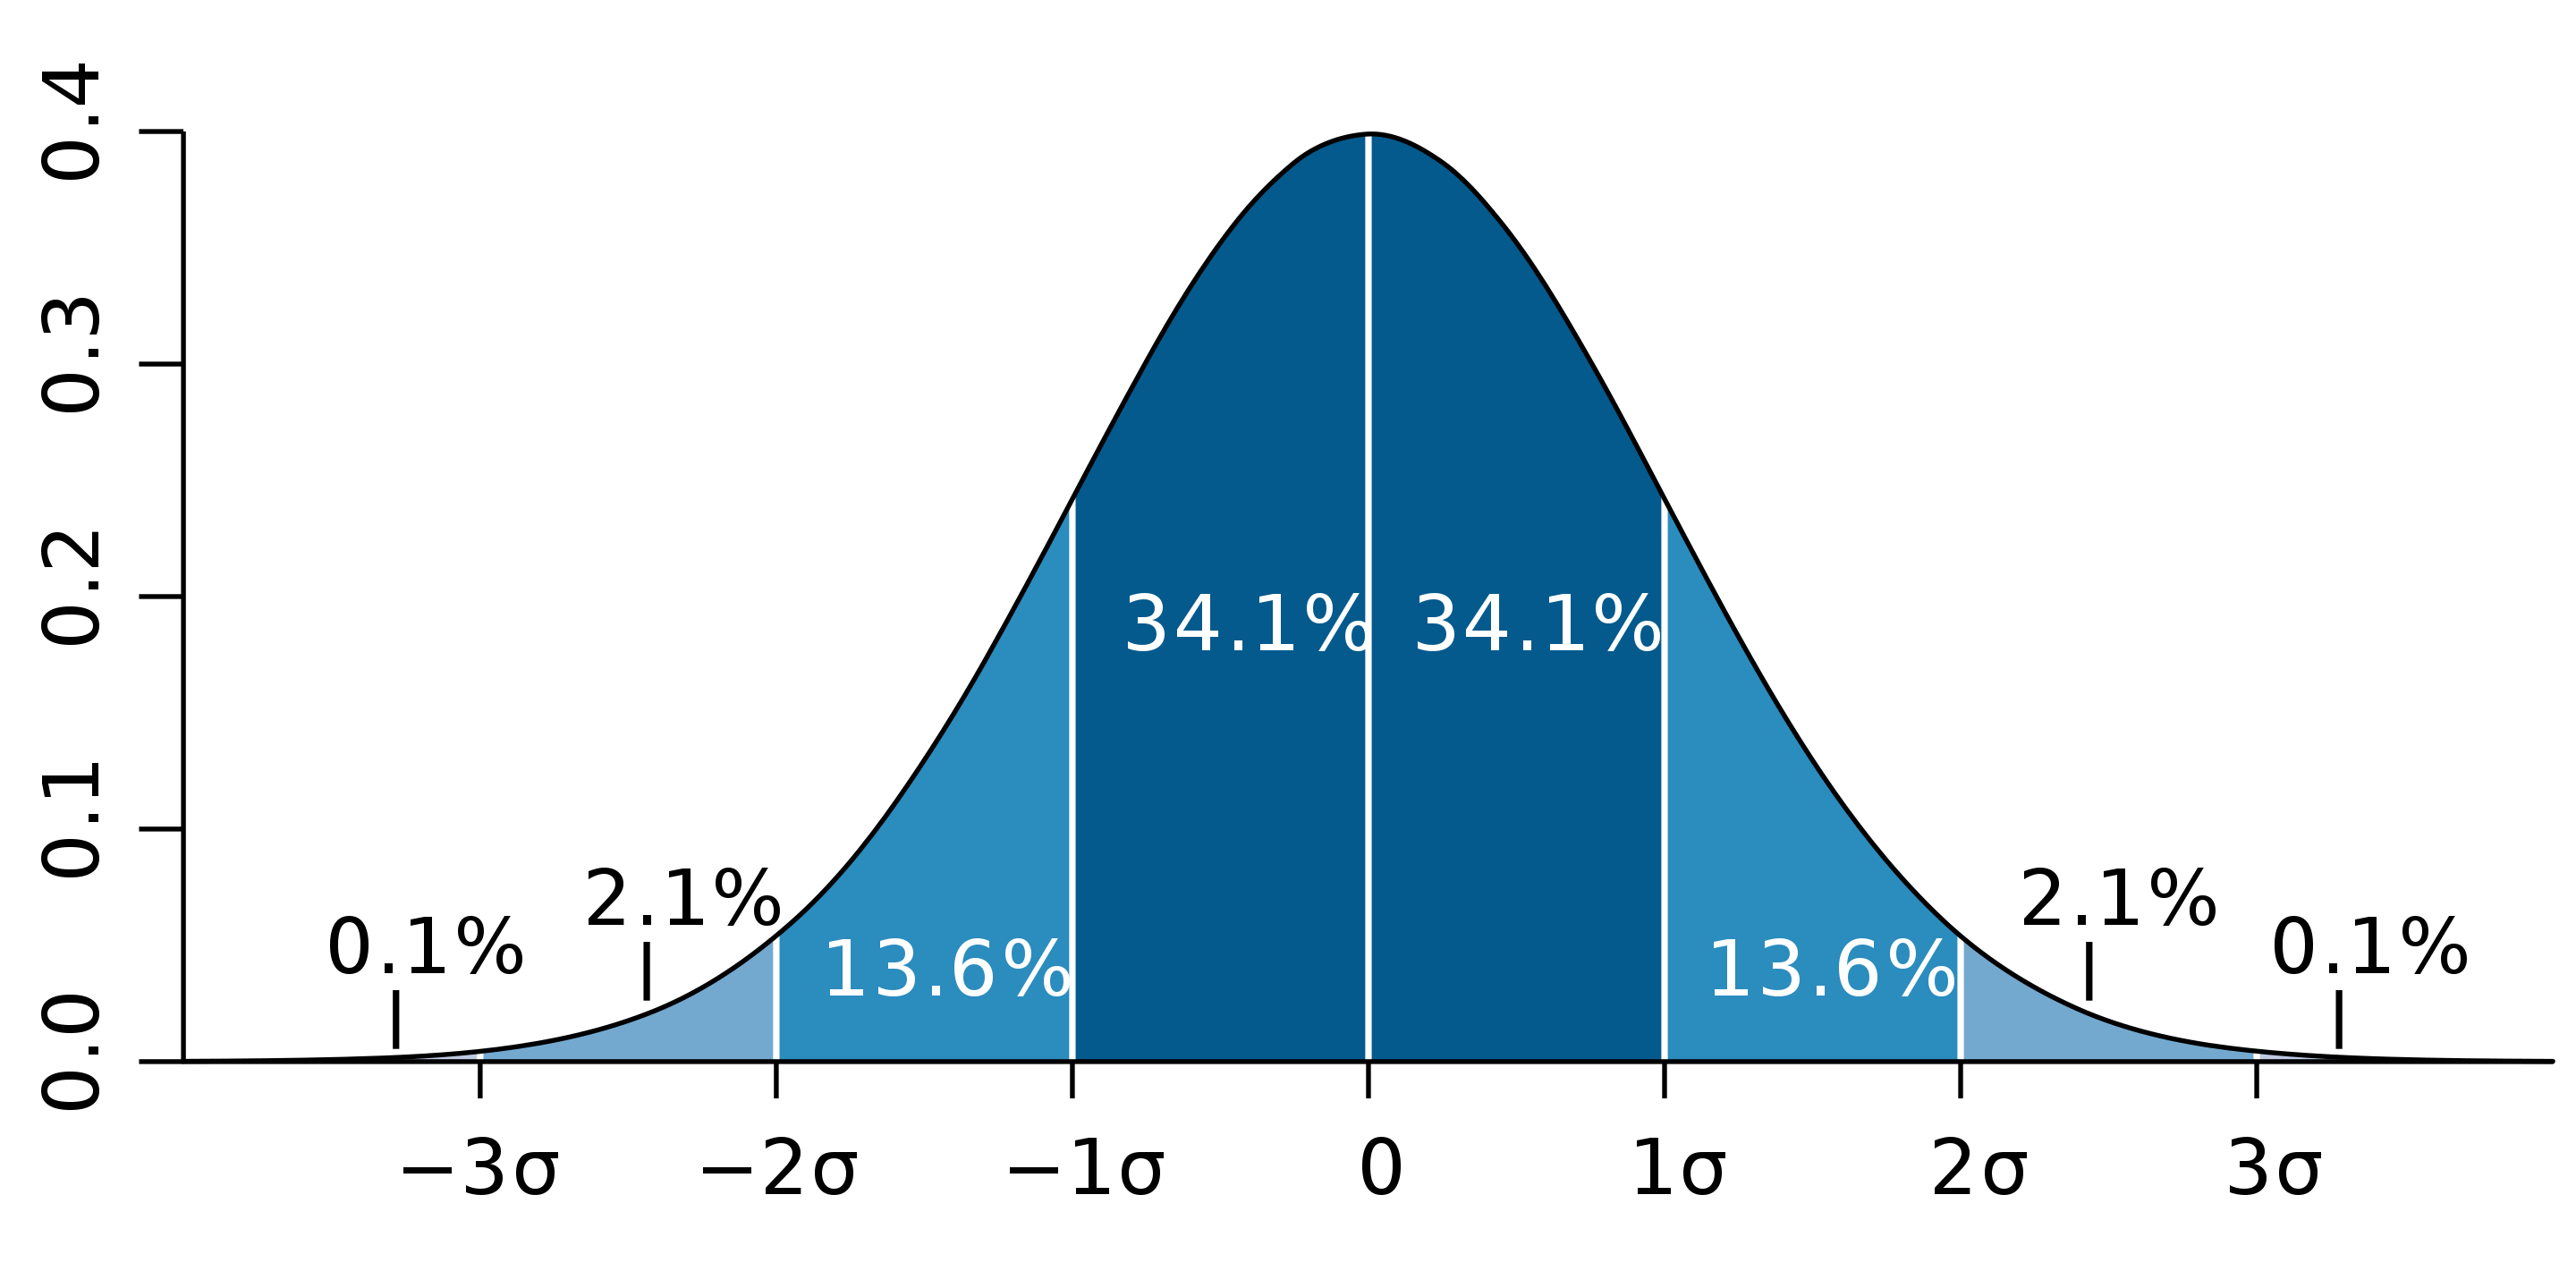

In [186]:
Image("../images/bell-curve-standard-deviation.png",width=650)

In [187]:
# rename the really long columns
students_df.rename(columns={"parental edu": "parental education"},inplace=True)
students_df

,gender,income level,parental education,lunch,test prep course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [188]:
# challenge: rename the score columns
# "math score" => "math"
# "reading score" => "reading"
# "writing score" => "writing"
students_df.rename(columns=
    { "math score": "math",
      "reading score": "reading",
      "writing score": "writing"
    }, inplace=True)

students_df

,gender,income level,parental education,lunch,test prep course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [189]:
# challenge: make a new col called "avg score" which is the mean of "math", "reading" and "writing" scores (rounded to 2 decimal place)
# HINT: Vector Operation - match across whole column (no explicit loop--it loops under the hood)
students_df["avg score"] = round((students_df["math"] + students_df["reading"] + students_df["writing"]) / 3,2)

In [190]:
students_df

,gender,income level,parental education,lunch,test prep course,math,reading,writing,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


In [191]:
# order the df by avg score in desc order
students_df.sort_values(by="avg score",ascending=False,inplace=True)

In [192]:
students_df

,gender,income level,parental education,lunch,test prep course,math,reading,writing,avg score
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.00
458,female,group E,bachelor's degree,standard,none,100,100,100,100.00
962,female,group E,associate's degree,standard,none,100,100,100,100.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.67
179,female,group D,some high school,standard,completed,97,100,100,99.00
...,...,...,...,...,...,...,...,...,...
76,male,group E,some high school,standard,none,30,26,22,26.00
327,male,group A,some college,free/reduced,none,28,23,19,23.33
596,male,group B,high school,free/reduced,none,30,24,15,23.00
980,female,group B,high school,free/reduced,none,8,24,23,18.33


In [193]:
# challenge: save to a new df only male students w parental edu equal to "bachelor's degree"
# "gender"
# "parental edu"
# HINT: (condition1) & (condition2) & ()
male_bach_edu_df = students_df[ 
    (students_df['gender']=='male') &
    (students_df['parental education']=='bachelor\'s degree')
]
print(male_bach_edu_df.shape) # (55, 9)
male_bach_edu_df

(55, 9)


,gender,income level,parental education,lunch,test prep course,math,reading,writing,avg score
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.00
571,male,group A,bachelor's degree,standard,none,91,96,92,93.00
562,male,group C,bachelor's degree,standard,completed,96,90,92,92.67
612,male,group C,bachelor's degree,standard,completed,94,90,91,91.67
551,male,group B,bachelor's degree,free/reduced,completed,87,90,88,88.33
702,male,group A,bachelor's degree,standard,completed,87,84,87,86.00
426,male,group C,bachelor's degree,standard,none,86,83,86,85.00
784,male,group C,bachelor's degree,standard,completed,91,81,79,83.67
234,male,group C,bachelor's degree,standard,completed,83,82,84,83.00
617,male,group D,bachelor's degree,standard,none,88,78,83,83.00


In [194]:
# ADD A third condition: free/reduced" lunch
# challenge: save to a new df only male students w parental edu equal to "bachelor's degree" and who get free lunch
# HINT: (condition1) & (condition2) & ()
male_bach_edu_free_df = students_df[ 
    (students_df['gender']=='male') &
    (students_df['parental education']=='bachelor\'s degree') & 
    (students_df['lunch']=='free/reduced')
]
print(male_bach_edu_free_df.shape) # (22,9)
male_bach_edu_free_df

(22, 9)


,gender,income level,parental education,lunch,test prep course,math,reading,writing,avg score
551,male,group B,bachelor's degree,free/reduced,completed,87,90,88,88.33
288,male,group B,bachelor's degree,free/reduced,none,88,75,76,79.67
134,male,group D,bachelor's degree,free/reduced,completed,74,79,75,76.00
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72,75.00
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80,75.00
933,male,group C,bachelor's degree,free/reduced,completed,70,75,74,73.00
757,male,group E,bachelor's degree,free/reduced,completed,70,68,72,70.00
817,male,group D,bachelor's degree,free/reduced,completed,61,70,76,69.00
569,male,group D,bachelor's degree,free/reduced,none,68,68,67,67.67
705,male,group A,bachelor's degree,free/reduced,none,62,72,65,66.33


In [195]:
# save to a new df only Top 10 females with
# avg score of at least 90

top_10_female_min_90_df = students_df[ 
    (students_df['gender'] == 'female') & 
    (students_df['avg score'] >= 90)
].sort_values(by="avg score", ascending=False).iloc[:10,:]

print(top_10_female_min_90_df.shape) # (10,9)
top_10_female_min_90_df


(10, 9)


,gender,income level,parental education,lunch,test prep course,math,reading,writing,avg score
458,female,group E,bachelor's degree,standard,none,100,100,100,100.00
962,female,group E,associate's degree,standard,none,100,100,100,100.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.67
179,female,group D,some high school,standard,completed,97,100,100,99.00
712,female,group D,some college,standard,none,98,100,99,99.00
165,female,group C,bachelor's degree,standard,completed,96,100,100,98.67
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,97.67
685,female,group E,master's degree,standard,completed,94,99,100,97.67
957,female,group D,master's degree,standard,none,92,100,100,97.33
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,97.33


In [196]:
# output -- dont' save --
# just the 6 students at index 50-55, and only 3 columns:
# 'gender', 'parental edu' and 'avg score'
# students_df.iloc[50:56,:]
# to get a slice of rows you can get away w/o using loc or iloc

# print(students_df.shape)
students_df.reset_index(drop=True,inplace=True)

students_df.loc[50:55,['gender', 'parental education', 'avg score']]

,gender,parental education,avg score
50,female,some high school,90.00
51,female,some college,90.00
52,female,associate's degree,89.67
53,female,some college,89.67
54,female,associate's degree,89.33
55,female,associate's degree,89.33


In [197]:
students_df.iloc[50:56,[0,2,-1]]

,gender,parental education,avg score
50,female,some high school,90.00
51,female,some college,90.00
52,female,associate's degree,89.67
53,female,some college,89.67
54,female,associate's degree,89.33
55,female,associate's degree,89.33


In [198]:
# for the above selection of 6 rows x 3 cols, you can also get away without using loc or iloc
# to do this, add df[row_start:row_end_excl][["col1","col2","col3"]] 
students_df[50:56][['gender', 'parental education', 'avg score']]

,gender,parental education,avg score
50,female,some high school,90.00
51,female,some college,90.00
52,female,associate's degree,89.67
53,female,some college,89.67
54,female,associate's degree,89.33
55,female,associate's degree,89.33


In [199]:
# get 5 random rows:
students_df.sample(5)

,gender,income level,parental education,lunch,test prep course,math,reading,writing,avg score
661,male,group E,some college,standard,none,68,60,59,62.33
177,male,group A,associate's degree,free/reduced,completed,79,82,82,81.00
565,male,group A,some high school,standard,completed,66,68,64,66.00
135,female,group A,high school,free/reduced,completed,77,88,85,83.33
552,female,group B,high school,free/reduced,none,60,72,68,66.67


In [200]:
# divide the 1000 students into 2 randomized groups of 500
# make a randomly shuffled version of the 1000 rows
students_randomized_df = students_df.sample(1000)
students_randomized_df.head()

,gender,income level,parental education,lunch,test prep course,math,reading,writing,avg score
435,male,group C,high school,standard,completed,75,69,68,70.67
664,male,group B,bachelor's degree,free/reduced,none,73,56,57,62.00
55,female,group A,associate's degree,standard,none,82,93,93,89.33
868,male,group D,associate's degree,standard,none,61,48,46,51.67
17,female,group A,some high school,standard,completed,92,100,97,96.33


In [201]:
# assign first 500 to group A, last 500 to group B, as new dfs
group_A_df = students_randomized_df.iloc[:500,:]
group_B_df = students_randomized_df.iloc[500:,:]

In [202]:
print(group_A_df.shape) # (500, 9)
group_A_df.head()

(500, 9)


,gender,income level,parental education,lunch,test prep course,math,reading,writing,avg score
435,male,group C,high school,standard,completed,75,69,68,70.67
664,male,group B,bachelor's degree,free/reduced,none,73,56,57,62.00
55,female,group A,associate's degree,standard,none,82,93,93,89.33
868,male,group D,associate's degree,standard,none,61,48,46,51.67
17,female,group A,some high school,standard,completed,92,100,97,96.33


In [203]:
print(group_B_df.shape) # (500, 9)
group_B_df.head()

(500, 9)


,gender,income level,parental education,lunch,test prep course,math,reading,writing,avg score
579,male,group C,associate's degree,free/reduced,completed,65,67,65,65.67
151,female,group C,some high school,standard,completed,76,87,85,82.67
297,female,group C,high school,standard,none,72,80,75,75.67
290,female,group D,some college,standard,completed,74,75,79,76.00
774,male,group E,associate's degree,standard,completed,62,56,53,57.00


**grouped_df = df.groupby('col name').count()**
- get groups by column values
- get groups by count or by mean
- works best for discreet values (limited number of different values)
- the resulting df uses the group values as the indices

In [204]:
# get the unique values for "parental education" col
edu_cats = students_df["parental education"].unique()
print(edu_cats) # ["bachelor's degree" "associate's degree" 'some high school' 'some college' "master's degree" 'high school']

["bachelor's degree" "associate's degree" 'some high school'
 'some college' "master's degree" 'high school']


In [208]:
# group by "edu" but only grab one col since all cols contain same count data:
edu_df = students_df.groupby('parental education')[['lunch']].count().sort_values(by="lunch",ascending=False)


In [209]:
print(edu_df.shape) # (6, 1)
edu_df

(6, 1)


,lunch
parental education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [210]:
edu_df.rename(columns={"lunch":"count"},inplace=True)

In [211]:
edu_df

,count
parental education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [207]:
edu_2col_df = edu_df.reset_index()
print(edu_2col_df.shape) # (6, 2)
edu_2col_df

(6, 2)


,parental education,lunch
0,associate's degree,222
1,bachelor's degree,118
2,high school,196
3,master's degree,59
4,some college,226
5,some high school,179


### **Data Visualization with Matplotlib**.

- **charts** show data on an **x-y coordinate system**
- **bar** chart consists of side-by-side (vertical) or stacked (horizontal) bars
- **Y-axis** is typically showing numeric values -- the bar values
- **X-axis** is typically showing categories -- the bar names
- we will make a bar chart from the students_df **groupby()** data
- **plt.bar(x_values,y_values)** makes vertical bars from x,y input lists
- **plt.barh(x_values,y_values)** makes horizontal bars from x,y input lists

In [216]:
# get the count column into a list:
count_col = edu_df["count"].tolist()
print(count_col)
edu_vals = list(edu_df.index)
print(edu_vals)
print()

print("edu_counts_list:") # [226, 222, 196, 179, 118, 59]

[226, 222, 196, 179, 118, 59]
['some college', "associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree"]

edu_counts_list:


In [ ]:
# make a bar chart of the 6 parental edu category counts
# colors = ["dodgerblue", "purple", "orange", "coral", "pink", "darkgreen"]


# "Students by Parental Education"
# 'Number of Students'

# set the xlim to widen bar to allow bar values to display

# plt.grid(ls='dashed')

# Add count labels to each bar
# loop the counts list: [222, 118, 196, 59, 226, 179]
# for

# plt.ylabel('Parental Education Category')


In [ ]:
# for loop with access to index, pass list to enumerate(list)
fruits = ['apple','banana','cherry','grape','lemon','mango']
